# CS506 Final Project - Feature Selection

### Author: Alec Silver

In [ ]:
# setup

import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

#mine
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import matplotlib.pyplot as plt
import seaborn as sns

import warnings

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Evaluation Methods

In [2]:
# load data
link1 = pd.read_csv('../data/processed/link1/link1.csv')

In [81]:
# food access features
X = link1[['Urban', 'POP2010', 'OHU2010', 'GroupQuartersFlag', 'NUMGQTRS', 'LILATracts_1And10', 'LILATracts_halfAnd10', 
     'LILATracts_1And20', 'LILATracts_Vehicle', 'HUNVFlag', 'LowIncomeTracts', 'LAPOP1_10', 'LAPOP05_10', 'LAPOP1_20', 
     'LALOWI1_10', 'LALOWI05_10', 'LALOWI1_20', 'lapophalf', 'lalowihalf', 'lakidshalf', 'laseniorshalf', 'lawhitehalf', 
     'lablackhalf', 'laasianhalf', 'lanhopihalf', 'laaianhalf', 'laomultirhalf', 'lahisphalf', 'lahunvhalf', 'lasnaphalf', 
     'lapop1', 'lalowi1', 'lakids1', 'laseniors1', 'lawhite1', 'lablack1', 'laasian1', 'lanhopi1', 'laaian1', 'laomultir1', 
     'lahisp1', 'lahunv1', 'lasnap1', 'lapop10', 'lalowi10', 'lakids10', 'laseniors10', 'lawhite10', 'lablack10', 'laasian10', 
     'lanhopi10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'lasnap10', 'lapop20', 'lalowi20', 'lakids20', 'laseniors20', 
     'lawhite20', 'lablack20', 'laasian20', 'lanhopi20', 'laaian20', 'laomultir20', 'lahisp20', 'lahunv20', 'lasnap20', 'TractLOWI', 
     'TractKids', 'TractSeniors', 'TractWhite', 'TractBlack', 'TractAsian', 'TractNHOPI', 'TractAIAN', 'TractOMultir', 'TractHisp', 
     'TractHUNV', 'TractSNAP', 'LA1and10', 'LAhalfand10', 'LA1and20', 'LATracts_half', 'LATracts1', 'LATracts10', 'LATracts20', 
     'LATractsVehicle_20', 'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare', 'laseniorshalfshare', 
     'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 
     'lahisphalfshare', 'lapop1share', 'lalowi1share', 'lakids1share', 'laseniors1share', 'lawhite1share', 'lablack1share', 
     'laasian1share', 'lanhopi1share', 'laaian1share', 'laomultir1share', 'lahisp1share', 'lapop10share', 'lalowi10share', 
     'lakids10share', 'laseniors10share', 'lawhite10share', 'lablack10share', 'laasian10share', 'lanhopi10share', 'laaian10share', 
     'laomultir10share', 'lahisp10share', 'lapop20share', 'lalowi20share', 'lakids20share', 'laseniors20share', 'lawhite20share', 
     'lablack20share', 'laasian20share', 'lanhopi20share', 'laaian20share', 'laomultir20share', 'lahisp20share', 'lahunv20share', 
     'lahunv10share', 'lahunvhalfshare', 'lahunv1share', 'lasnap20share', 'lasnap10share', 'lasnaphalfshare', 'lasnap1share', 
     'MedianFamilyIncome']]

# target var
y = link1['2015 Food Insecurity Rate']

In [14]:
#load a and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [41]:
# Will test with Random Forest Regressor before and after dimensionality reduction
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.7863329162151546


## dimension reduction
While SVD is great for feature reduction, it can make results more difficult to interperet, I will be using RFECV instead. 

In [83]:
#try recursive feature elimination
# this may take a while
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline


estimator = RandomForestRegressor(n_estimators=200, random_state=42) #LinearRegression() #LinearSVR(random_state=42, max_iter=80000)
selector = RFECV(estimator, step=0.1, cv=10, scoring='r2', n_jobs=-1)



pipe = make_pipeline(StandardScaler(), selector )
# Pipeline
pipe.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

KeyboardInterrupt: 

In [ ]:
results = selector.cv_results_


dict_keys(['mean_test_score', 'std_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'split5_test_score', 'split6_test_score', 'split7_test_score', 'split8_test_score', 'split9_test_score', 'split0_ranking', 'split1_ranking', 'split2_ranking', 'split3_ranking', 'split4_ranking', 'split5_ranking', 'split6_ranking', 'split7_ranking', 'split8_ranking', 'split9_ranking', 'split0_support', 'split1_support', 'split2_support', 'split3_support', 'split4_support', 'split5_support', 'split6_support', 'split7_support', 'split8_support', 'split9_support', 'n_features'])

Text(0.5, 1.0, 'RFECV - RandomForestRegressor: Number of features vs. R2 Score')

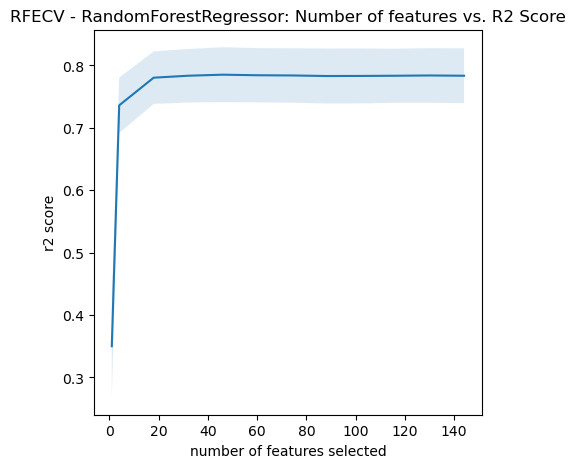

In [25]:
#plot number of features vs score
n_features = results['n_features']
mean = results['mean_test_score']
std = results['std_test_score']
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(n_features, mean)
ax.fill_between(n_features, mean - std, mean + std, alpha=0.15)
ax.set_ylabel("r2 score")
ax.set_xlabel("number of features selected")
ax.set_title(f"RFECV - RandomForestRegressor: Number of features vs. R2 Score")

In [27]:
# get chosen features 
chosen_features = X.columns[selector.support_]
print("Chosen features:", chosen_features.tolist())

Chosen features: ['NUMGQTRS', 'LALOWI1_10', 'lablack1', 'lanhopi1', 'lahisp1', 'lahunv1', 'laseniors10', 'lablack10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'TractKids', 'TractHisp', 'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare', 'laseniorshalfshare', 'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare', 'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 'lahisphalfshare', 'lakids1share', 'laseniors1share', 'lawhite1share', 'lablack1share', 'laasian1share', 'lanhopi1share', 'laaian1share', 'laomultir1share', 'lahisp1share', 'laseniors10share', 'lablack10share', 'laasian10share', 'laaian10share', 'lahisp10share', 'lahunvhalfshare', 'lahunv1share', 'lasnaphalfshare', 'lasnap1share', 'MedianFamilyIncome']


In [ ]:
# program too 30 min to run, if needed, here is the list of chosen features
"""
chosen_features = ['NUMGQTRS', 'LALOWI1_10', 'lablack1', 'lanhopi1', 'lahisp1', 'lahunv1', 'laseniors10',
               'lablack10', 'laaian10', 'laomultir10', 'lahisp10', 'lahunv10', 'TractKids', 'TractHisp',
                'PCTGQTRS', 'PovertyRate', 'lapophalfshare', 'lalowihalfshare', 'lakidshalfshare',
                'laseniorshalfshare', 'lawhitehalfshare', 'lablackhalfshare', 'laasianhalfshare',
                'lanhopihalfshare', 'laaianhalfshare', 'laomultirhalfshare', 'lahisphalfshare', 'lakids1share',
                'laseniors1share', 'lawhite1share', 'lablack1share', 'laasian1share', 'lanhopi1share', 'laaian1share',
                'laomultir1share', 'lahisp1share', 'laseniors10share', 'lablack10share', 'laasian10share', 'laaian10share',
                'lahisp10share', 'lahunvhalfshare', 'lahunv1share', 'lasnaphalfshare', 'lasnap1share', 'MedianFamilyIncome']
"""

In [28]:
# Remake X with only chosen features
X_reduced = X[chosen_features]
X_test_reduced = X_test[chosen_features]
X_train_reduced = X_train[chosen_features]

In [38]:
# get feature importances of chosen features
importances = selector.estimator_.feature_importances_
feature_importances = pd.Series(importances, index=chosen_features).sort_values(ascending=False)


In [49]:
#bring in metadata for feature names
metadata = pd.read_csv('../data/raw/usda_food_access/metadata/food_atlas_col_key.csv')
metadata.head()
#merge to get feature descriptions
feature_importances_df = pd.merge(feature_importances.rename("Importance"), metadata, left_index=True, right_on="Column")
feature_importances_df.head()

,Importance,Column,Data_Value_Unit,Description
12,0.474213,PovertyRate,%,Tract poverty rate
39,0.217752,lablackhalfshare,%,"Low access, Black or African American populati..."
49,0.051857,lahisphalfshare,%,"Low access, Hispanic or Latino population at 1..."
37,0.016239,lawhitehalfshare,%,"Low access, White population at 1/2 mile, share"
13,0.015033,MedianFamilyIncome,%,Tract median family income


In [50]:
# description too long, replace commas with new lines
feature_importances_df['Description'] = feature_importances_df['Description'].str.replace(', ', '\n')

#add another new line after "population", and remove word "share"
feature_importances_df['Description'] = feature_importances_df['Description'].str.replace('population', 'population\n').str.replace('share', '')

Text(0.5, 1.0, 'Track 1 top 10 Feature Importances\n RandomForestRegressor after RFECV: 46 Features Selected')

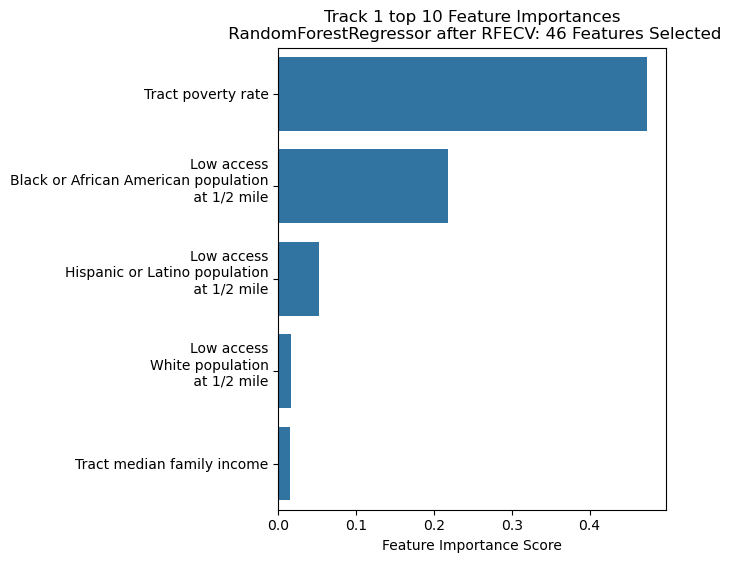

In [51]:
# make a bar graph of feature importances top 10
n = 5
plt.figure(figsize=(5, 6))
sns.barplot(x=feature_importances_df["Importance"].values[0:n], y=feature_importances_df["Description"].values[0:n])
plt.xlabel("Feature Importance Score")
plt.title(f"Track 1 top 10 Feature Importances\n RandomForestRegressor after RFECV: {selector.n_features_} Features Selected")

# Link 2

In [52]:
# load data
link2 = pd.read_csv('../data/processed/link2/link2.csv')
link2['TotalPopulation'] = link2['TotalPopulation'].str.replace(',', '').astype(int)

In [53]:
# food insecurity features
X = link2[['2017 Food Insecurity Rate', '# of Food Insecure Persons in 2017', 'Low Threshold in state', 
          'High Threshold in state', '% FI ≤ Low Threshold', 
          '% FI > High Threshold', '2017 Child food insecurity rate', 
          '# of Food Insecure Children in 2017', '% food insecure children in HH w/ HH incomes below 185 FPL in 2017', 
          '% food insecure children in HH w/ HH incomes above 185 FPL in 2017', '2017 Cost Per Meal', 
          '2017 Weighted Annual Food Budget Shortfall', 'TotalPopulation']] 

# target var
y = link2['Chronic_CrudePrev_Mean']

In [54]:
#load a and split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [55]:
# Will test with Random Forest Regressor before and after dimensionality reduction
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))

R2 Score: 0.6868644596533291


## dimension reduction
While SVD is great for feature reduction, it can make results more difficult to interperet, I will be using RFECV instead. 

In [56]:
#try recursive feature elimination
# this may take a while
from sklearn.feature_selection import RFECV
from sklearn.svm import LinearSVR
from sklearn.pipeline import make_pipeline


estimator = RandomForestRegressor(n_estimators=200, random_state=42) #LinearRegression() #LinearSVR(random_state=42, max_iter=80000)
selector = RFECV(estimator, step=0.1, cv=10, scoring='r2', n_jobs=-1)



pipe = make_pipeline(StandardScaler(), selector )
# Pipeline
pipe.fit(X_train, y_train)
print("Optimal number of features : %d" % selector.n_features_)

Optimal number of features : 12


In [57]:
results = selector.cv_results_


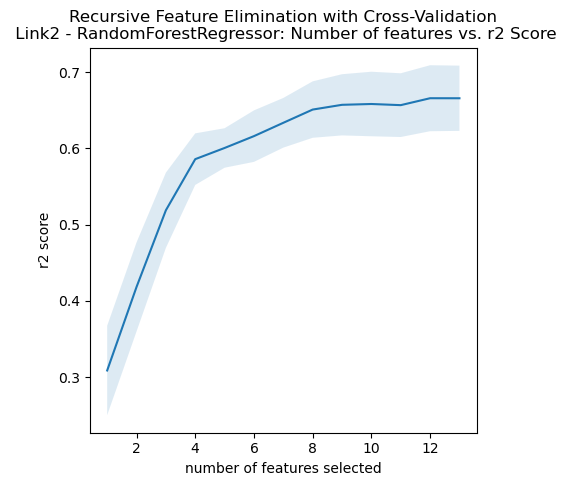

In [77]:
#plot number of features vs score
n_features = results['n_features']
mean = results['mean_test_score']
std = results['std_test_score']
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(n_features, mean)
ax.fill_between(n_features, mean - std, mean + std, alpha=0.15)
ax.set_ylabel("r2 score")
ax.set_xlabel("number of features selected")
ax.set_title(f"Recursive Feature Elimination with Cross-Validation\n Link2 - RandomForestRegressor: Number of features vs. r2 Score")

fig.savefig('../figures/feature_selection/RFECV_Track2.png', bbox_inches='tight')

in this case best to keep all features

In [64]:
#refit full model
rf = RandomForestRegressor(n_estimators=200, random_state=42) #LinearRegression() #LinearSVR(random_state=42, max_iter=80000)




pipe = make_pipeline(StandardScaler(), rf )

pipe.fit(X_train, y_train)
# get feature importances of chosen features
importances = rf.feature_importances_
feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)


In [70]:
# in index put a new line after children

feature_importances.index = feature_importances.index.str.replace('children', 'children\n')

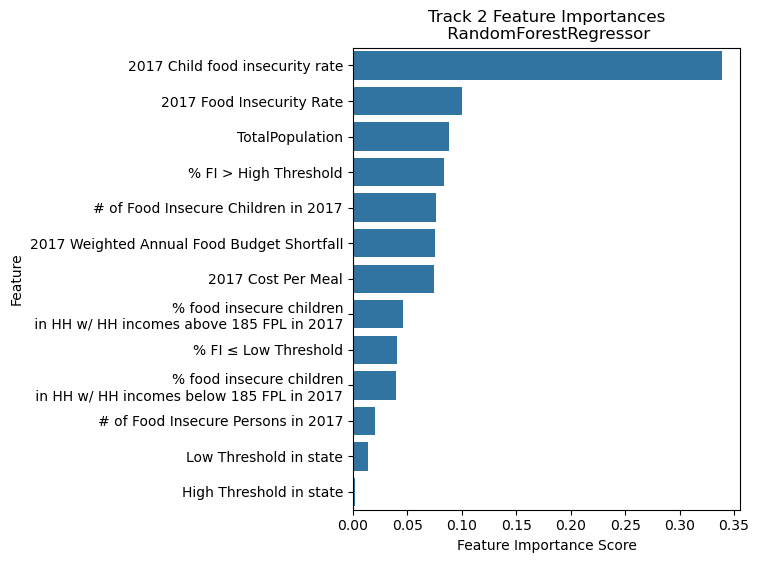

In [80]:
# make a bar graph of feature importances top 10
n = 5
fig = plt.figure(figsize=(5, 6))
sns.barplot(x=feature_importances.values, y=feature_importances.index)
plt.xlabel("Feature Importance Score")
plt.ylabel("Feature")
plt.title(f"Track 2 Feature Importances\n RandomForestRegressor")

fig.savefig('../figures/feature_selection/Feature_Importances_Track2.png', bbox_inches='tight')